In [1]:
#Here's the implementation of the Network Intrusion detection system using various python libraries
#Importing required libraries for reading the datasets and performing computations

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv('./SDN_Intrusion.csv')

In [3]:
df.Class.value_counts()

BENIGN                        798322
DDoS                          383439
Web Attack � Brute Force        4550
Web Attack � XSS                1962
Web Attack � Sql Injection        60
Name: Class, dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

In [5]:
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)


In [6]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
df_minor = df[(df['Class']==2)|(df['Class']==3)|(df['Class']==4)]
df_major = df.drop(df_minor.index)

X = df_major.drop(['Class'],axis=1) 
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)


In [7]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)
klabel=kmeans.labels_
df_major['klabel']=klabel
cols = list(df_major)
cols.insert(80, cols.pop(cols.index('Class')))
df_major = df_major.loc[:, cols]

In [8]:
def typicalSampling(group):
    name = group.name
    frac = 0.008
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)
result['Class'].value_counts()
result = result.drop(['klabel'],axis=1)
result = result.append(df_minor)

C:\Users\percy\AppData\Local\Temp\ipykernel_6784\2723832958.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(df_minor)


In [9]:
result.to_csv('./sample_km.csv',index=0)
df=pd.read_csv('./sample_km.csv')
X = df.drop(['Class'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [11]:
df.Class.value_counts()

0    6387
2    4550
1    3047
4    1962
3      60
Name: Class, dtype: int64

Accuracy of RF: 0.9818863210493441
Precision of RF: 0.9821335516864965
Recall of RF: 0.9818863210493441
F1-score of RF: 0.9816666943809031
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1278
           1       1.00      1.00      1.00       610
           2       0.95      0.99      0.97       910
           3       1.00      1.00      1.00        12
           4       0.97      0.89      0.93       392

    accuracy                           0.98      3202
   macro avg       0.98      0.97      0.98      3202
weighted avg       0.98      0.98      0.98      3202



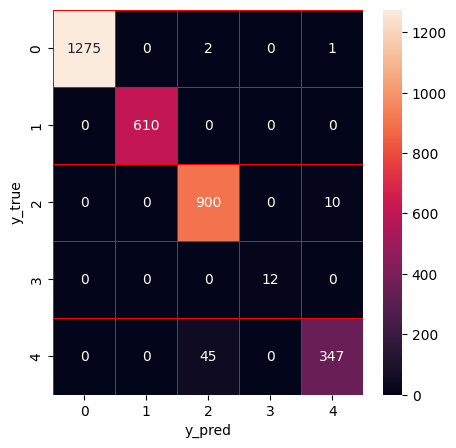

In [12]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state = 0)
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

     --------------------------------------- 89.1/89.1 MB 14.5 MB/s eta 0:00:00
Accuracy of XGBoost: 0.896627108057464
Precision of XGBoost: 0.8973055231497112
Recall of XGBoost: 0.896627108057464
F1-score of XGBoost: 0.8783760043390267
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1278
           1       1.00      1.00      1.00       610
           2       0.75      0.96      0.84       910
           3       1.00      0.58      0.74        12
           4       0.75      0.26      0.39       392

    accuracy                           0.90      3202
   macro avg       0.90      0.76      0.79      3202
weighted avg       0.90      0.90      0.88      3202



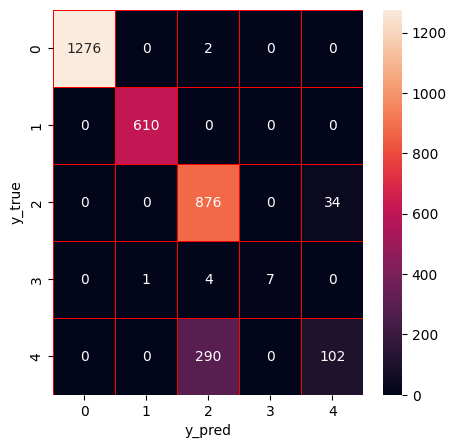

In [14]:
#XGBoost algorithm
!pip install xgboost
import xgboost as xgb
from xgboost import plot_importance
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of DT: 0.9687695190505934
Precision of DT: 0.968942276635431
Recall of DT: 0.9687695190505934
F1-score of DT: 0.968846966520799
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1278
           1       1.00      1.00      1.00       610
           2       0.95      0.95      0.95       910
           3       0.85      0.92      0.88        12
           4       0.87      0.88      0.88       392

    accuracy                           0.97      3202
   macro avg       0.93      0.95      0.94      3202
weighted avg       0.97      0.97      0.97      3202



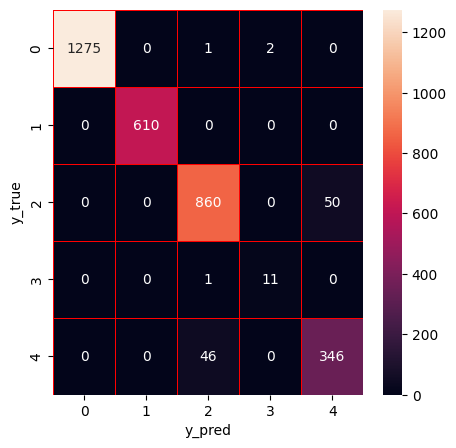

In [16]:
#Decision tree Classifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.9846970643347908
Precision of ET: 0.9847674145582928
Recall of ET: 0.9846970643347908
F1-score of ET: 0.9846106890068983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1278
           1       1.00      1.00      1.00       610
           2       0.96      0.99      0.97       910
           3       1.00      0.92      0.96        12
           4       0.97      0.92      0.94       392

    accuracy                           0.98      3202
   macro avg       0.99      0.96      0.97      3202
weighted avg       0.98      0.98      0.98      3202



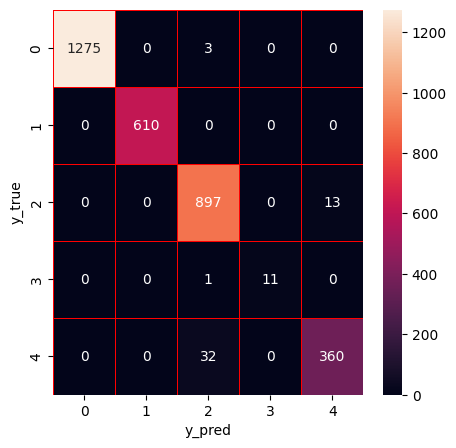

In [17]:
#Extra Trees Classifier
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy with 5 85.35290443472829


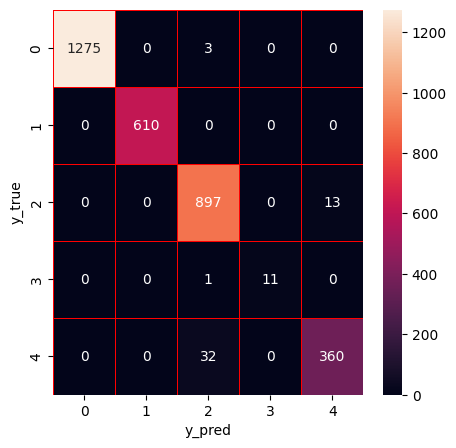

In [33]:
#K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
y_pred_ = knn5.predict(X_test)

print("Accuracy with "+str(k), accuracy_score(y_test, y_pred_)*100)

y_true= y_test
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()